<a href="https://colab.research.google.com/github/Rohit9403/Yolov3-on-Custom-Dataset/blob/master/Yolo_tiny_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cloning the darknet network


In [0]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 12985 (delta 3), reused 9 (delta 3), pack-reused 12975
Receiving objects: 100% (12985/12985), 11.77 MiB | 1.76 MiB/s, done.
Resolving deltas: 100% (8866/8866), done.


Before changing the directory,  delet the makefile present in darknet folder and upload the new one which will be given in my github repository.

In [0]:
cd /content/darknet

/content/darknet


In [0]:
ls

3rdparty/     cmake/                  image_yolov2.sh*        net_cam_v3.sh*
appveyor.yml  CMakeLists.txt          image_yolov3.sh*        README.md
build/        DarknetConfig.cmake.in  include/                scripts/
build.ps1*    darknet.py              json_mjpeg_streams.sh*  src/
build.sh*     darknet_video.py        LICENSE                 video_v2.sh*
cfg/          data/                   Makefile                video_yolov3.sh*


This is to install all dependencies required for the darknet network including gcc and CUDNN.

In [0]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-Wunused

In [0]:
ls

3rdparty/     cmake/                  image_yolov2.sh*        obj/
appveyor.yml  CMakeLists.txt          image_yolov3.sh*        README.md
backup/       darknet*                include/                results/
build/        DarknetConfig.cmake.in  json_mjpeg_streams.sh*  scripts/
build.ps1*    darknet.py              LICENSE                 src/
build.sh*     darknet_video.py        Makefile                video_v2.sh*
cfg/          data/                   net_cam_v3.sh*          video_yolov3.sh*


Checking the usage of network

In [0]:
!./darknet


usage: ./darknet <function>


#Pretrained CNN network

We will be using darknet.conv.74 for our Yolo3 tiny model

In [0]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-03-31 07:14:41--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   305KB/s    in 8m 52s  

2020-03-31 07:23:34 (298 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



#Training on custom data

"obj.data": Explanation in readme file of github repository

"Yolo_tiny.cfg": To edit it according to your data refer my gihub readme file.

The max_iterations in the cfg file will decide the numbeer of epochs. So if max_iterations are 2000 then no of epochs will be 2000. So after 2000 epochs the final weight file will be present in backup folder of darknet repository.

Also After each 1000 epochs the weight file will be saved in backup folder.

In [0]:
!./darknet detector train /content/obj.data /content/Yolo_tiny.cfg /content/darknet/darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000005, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.687652, GIOU: 0.686846), Class: 0.988212, Obj: 0.317838, No Obj: 0.002068, .5R: 1.000000, .75R: 0.333333, count: 3, class_loss = 0.569448, iou_loss = 0.261850, total_loss = 0.831298 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000005, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 

 1744: 0.549296, 0.607995 avg loss, 0.000100 rate, 0.457589 seconds, 41856 images, 0.057452 time left
Loaded: 0.000039 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 

#Testing of Images and Videos

In [0]:
!./darknet detector test /content/obj.data /content/Yolo_tiny.cfg /content/darknet/backup/Yolo_tiny_final.weights /content/spit55.jpg -i 0 -thresh 0.5

 CUDA-version: 10000 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV isn't used - data increase will run slowly 
 compute_capability = 610, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/

In order to open the predicted image we will use OpenCV and the function Given Below

In [0]:
#Let's define some functions that will let us show images, and upload and 
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

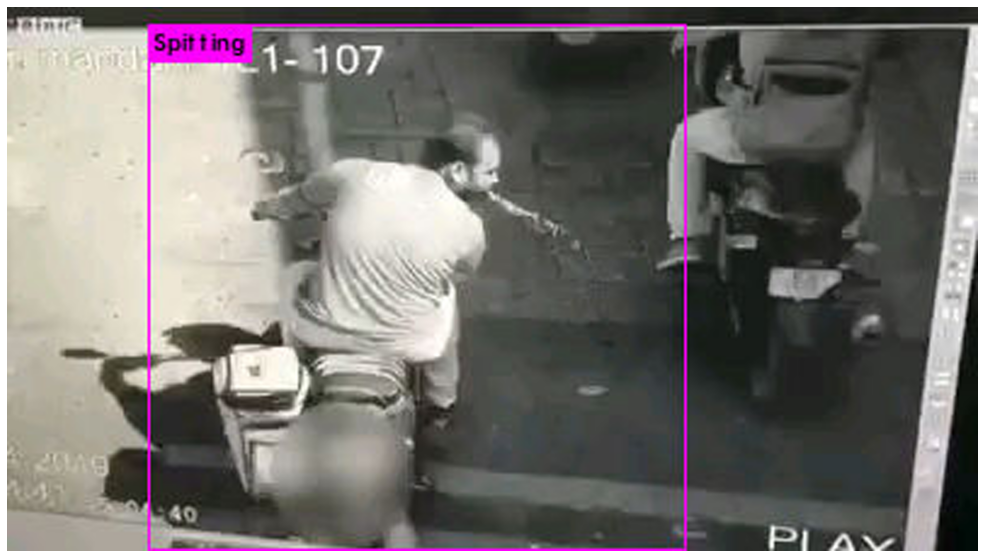

In [0]:
imShow('predictions.jpg')

To test the network on ".mp4" file my suggestion is to upload it manually on colab notebook instead of accessing it from Google drive. If the video is larger than 10Mb it will throw an error in both the case. So try to test it on video which is less than 10mb.  

In [0]:
!./darknet detector demo /content/obj.data /content/Yolo_tiny.cfg /content/darknet/backup/Yolo_tiny_final.weights -dont_show /content/News.mp4  -i 0 -out_filename out.avi

 CUDA-version: 10000 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Demo
 compute_capability = 610, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->

In [0]:
download("out.avi")